In [6]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
#from pandas_profiling import ProfileReport

In [2]:
file = open("/home/bambito9/Esports-Data-Analysis/API Requests/League of Legends/Riot Games API/playersV4.json")
players = json.load(file)
file.close()

---

### Professional Players Data Set

In [11]:
df = pd.read_csv("Professional/FinalProfessionalPlayersDataset2.csv")
df

,gameId,team,summoner,region,champion,timestamp,coordinate_x,coordinate_y,level,minionsKilled,...,trueDamageDoneToChampions,trueDamageTaken,victory,eventType,skillSlot,buildingType,lane,monster,itemName,role
0,EUW1_6391611617,Red,anonymous 24,euw1,Karthus,0.000000,14539.0,14394.0,1.0,0.0,...,0.0,0.0,True,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE
1,EUW1_6391611617,Red,anonymous 24,euw1,Karthus,1.000433,6866.0,9813.0,1.0,0.0,...,0.0,0.0,True,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE
2,EUW1_6391611617,Red,anonymous 24,euw1,Karthus,0.074367,NaN,NaN,NaN,NaN,...,NaN,NaN,True,Item purchased,NaN,NaN,NaN,NaN,Scorchclaw Pup,JUNGLE
3,EUW1_6391611617,Red,anonymous 24,euw1,Karthus,0.079933,NaN,NaN,NaN,NaN,...,NaN,NaN,True,Item purchased,NaN,NaN,NaN,NaN,Stealth Ward,JUNGLE
4,EUW1_6391611617,Red,anonymous 24,euw1,Karthus,0.086600,NaN,NaN,NaN,NaN,...,NaN,NaN,True,Item purchased,NaN,NaN,NaN,NaN,Health Potion,JUNGLE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54380,KR_6499716626,Red,anonymous 49,kr,Vi,21.752633,14061.0,8984.0,NaN,NaN,...,NaN,NaN,False,Assist,NaN,NaN,NaN,NaN,NaN,JUNGLE
54381,KR_6499716626,Red,anonymous 49,kr,Vi,21.832900,13216.0,9565.0,NaN,NaN,...,NaN,NaN,False,Assist,NaN,NaN,NaN,NaN,NaN,JUNGLE
54382,KR_6499716626,Red,anonymous 49,kr,Vi,21.874033,13330.0,8988.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
54383,KR_6499716626,Red,anonymous 49,kr,Vi,22.606467,14340.0,14391.0,12.0,25.0,...,665.0,1578.0,False,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54385 entries, 0 to 54384
Data columns (total 55 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   gameId                         54385 non-null  object 
 1   team                           54385 non-null  object 
 2   summoner                       54385 non-null  object 
 3   region                         54385 non-null  object 
 4   champion                       54385 non-null  object 
 5   timestamp                      54385 non-null  float64
 6   coordinate_x                   30335 non-null  float64
 7   coordinate_y                   30335 non-null  float64
 8   level                          18393 non-null  float64
 9   minionsKilled                  18393 non-null  float64
 10  jungleMinionsKilled            18393 non-null  float64
 11  currentGold                    18393 non-null  float64
 12  goldPerSecond                  18393 non-null 

In [5]:
df['monster'].value_counts(dropna=False)

NaN                52373
RIFTHERALD           638
BARON_NASHOR         339
HEXTECH_DRAGON       188
EARTH_DRAGON         176
FIRE_DRAGON          174
AIR_DRAGON           167
CHEMTECH_DRAGON      164
WATER_DRAGON         162
ELDER_DRAGON           4
Name: monster, dtype: int64

In [6]:
df2 = df
df2['skillSlot'] = df['skillSlot'].apply(str)
np.unique(df["skillSlot"])

array(['1.0', '2.0', '3.0', '4.0', 'nan'], dtype=object)

In [7]:
df2 = df
df2['buildingType'] = df['buildingType'].apply(str)
np.unique(df["buildingType"])

array(['INHIBITOR_BUILDING', 'TOWER_BUILDING', 'nan'], dtype=object)

In [8]:
df2 = df
df2['lane'] = df['lane'].apply(str)
np.unique(df["lane"])

array(['BOT_LANE', 'MID_LANE', 'TOP_LANE', 'nan'], dtype=object)

In [9]:
df2 = df
df2['monster'] = df['monster'].apply(str)
np.unique(df["monster"])

array(['AIR_DRAGON', 'BARON_NASHOR', 'CHEMTECH_DRAGON', 'EARTH_DRAGON',
       'ELDER_DRAGON', 'FIRE_DRAGON', 'HEXTECH_DRAGON', 'RIFTHERALD',
       'WATER_DRAGON', 'nan'], dtype=object)

In [10]:
print("The data set with professional players contains {} matches.".format(len(np.unique(df["gameId"]))))

The data set with professional players contains 680 matches.


In [11]:
print("The data set with professional players contains {} players.".format(len(np.unique(df["summoner"]))))

The data set with professional players contains 19 players.


Remove remaked matches

In [12]:
games = df[df["timestamp"] > 5]

remaked = []
totalMatches = len(np.unique(games["gameId"]))
count = 0
for match in np.unique(df["gameId"]):
    count += 1
    print("{} of {}".format(count, totalMatches))
    if((match in np.unique(games["gameId"])) == False):
        remaked.append(match)

print("Number of remaked matches: {}".format(len(remaked)))

1 of 680
2 of 680
3 of 680
4 of 680
5 of 680
6 of 680
7 of 680
8 of 680
9 of 680
10 of 680
11 of 680
12 of 680
13 of 680
14 of 680
15 of 680
16 of 680
17 of 680
18 of 680
19 of 680
20 of 680
21 of 680
22 of 680
23 of 680
24 of 680
25 of 680
26 of 680
27 of 680
28 of 680
29 of 680
30 of 680
31 of 680
32 of 680
33 of 680
34 of 680
35 of 680
36 of 680
37 of 680
38 of 680
39 of 680
40 of 680
41 of 680
42 of 680
43 of 680
44 of 680
45 of 680
46 of 680
47 of 680
48 of 680
49 of 680
50 of 680
51 of 680
52 of 680
53 of 680
54 of 680
55 of 680
56 of 680
57 of 680
58 of 680
59 of 680
60 of 680
61 of 680
62 of 680
63 of 680
64 of 680
65 of 680
66 of 680
67 of 680
68 of 680
69 of 680
70 of 680
71 of 680
72 of 680
73 of 680
74 of 680
75 of 680
76 of 680
77 of 680
78 of 680
79 of 680
80 of 680
81 of 680
82 of 680
83 of 680
84 of 680
85 of 680
86 of 680
87 of 680
88 of 680
89 of 680
90 of 680
91 of 680
92 of 680
93 of 680
94 of 680
95 of 680
96 of 680
97 of 680
98 of 680
99 of 680
100 of 680
101 of 6

Matches per role:

In [12]:
gameRoles = ["TOP", "JUNGLE","MIDDLE", "BOTTOM", "UTILITY"]

for role in gameRoles:
    temporary_df = df[df["role"] == role]
    matches_per_role = len(np.unique(temporary_df["gameId"]))
    print("{} matches: {}".format(role, matches_per_role))

TOP matches: 0
JUNGLE matches: 680
MIDDLE matches: 0
BOTTOM matches: 0
UTILITY matches: 0


Players per role:

In [14]:
gameRoles = ["TOP", "JUNGLE","MIDDLE", "BOTTOM", "UTILITY"]

for role in gameRoles:
    temporary_df = df[df["role"] == role]
    players_per_role = len(np.unique(temporary_df["summoner"]))
    print("{} players: {}".format(role, players_per_role))

TOP players: 0
JUNGLE players: 19
MIDDLE players: 0
BOTTOM players: 0
UTILITY players: 0


Matches per region

In [15]:
regions = ["euw1", "na1", "kr"]

for region in regions:
    temporary_df = df[df["region"] == region]
    matches_per_division = len(np.unique(temporary_df["gameId"]))
    print("{} matches: {}".format(region, matches_per_division))

euw1 matches: 340
na1 matches: 50
kr matches: 290


Player per region:

In [16]:
regions = ["euw1", "na1", "kr"]

for region in regions:
    temporary_df = df[df["region"] == region]
    players_per_division = len(np.unique(temporary_df["summoner"]))
    print("{} players: {}".format(region, players_per_division))

euw1 players: 8
na1 players: 2
kr players: 9


Average game time

In [17]:
temp_df = df[df["eventType"].isna()]
temp_df

match_time = []
for match in np.unique(temp_df["gameId"]):
    tempV2_df = temp_df[temp_df["gameId"] == match]
    tempV2_df = tempV2_df.sort_values(by=["timestamp"])
    match_time.append(np.amax(tempV2_df["timestamp"]))

print("The matches have an average time of {}".format(np.mean(match_time)))

The matches have an average time of 25.118994485294117


In [18]:
temp_df = df[(df["eventType"].isna()) & (df["team"] == "Red") & (df["victory"] == True)]
temp_df

match_time = []
for match in np.unique(temp_df["gameId"]):
    tempV2_df = temp_df[temp_df["gameId"] == match]
    tempV2_df = tempV2_df.sort_values(by=["timestamp"])
    match_time.append(np.amax(tempV2_df["timestamp"]))

print("The matches have an average time of {} when they win on the red side".format(np.mean(match_time)))

The matches have an average time of 24.87166410818713 when they win on the red side


In [19]:
temp_df = df[(df["eventType"].isna()) & (df["team"] == "Red") & (df["victory"] == False)]
temp_df

match_time = []
for match in np.unique(temp_df["gameId"]):
    tempV2_df = temp_df[temp_df["gameId"] == match]
    tempV2_df = tempV2_df.sort_values(by=["timestamp"])
    match_time.append(np.amax(tempV2_df["timestamp"]))

print("The matches have an average time of {} when they lose on the red side".format(np.mean(match_time)))

The matches have an average time of 24.77077225672878 when they lose on the red side


In [20]:
temp_df = df[(df["eventType"].isna()) & (df["team"] == "Blue") & (df["victory"] == True)]
temp_df

match_time = []
for match in np.unique(temp_df["gameId"]):
    tempV2_df = temp_df[temp_df["gameId"] == match]
    tempV2_df = tempV2_df.sort_values(by=["timestamp"])
    match_time.append(np.amax(tempV2_df["timestamp"]))

print("The matches have an average time of {} when they win on the blue side".format(np.mean(match_time)))

The matches have an average time of 24.84004980506823 when they win on the blue side


In [21]:
temp_df = df[(df["eventType"].isna()) & (df["team"] == "Blue") & (df["victory"] == False)]
temp_df

match_time = []
for match in np.unique(temp_df["gameId"]):
    tempV2_df = temp_df[temp_df["gameId"] == match]
    tempV2_df = tempV2_df.sort_values(by=["timestamp"])
    match_time.append(np.amax(tempV2_df["timestamp"]))

print("The matches have an average time of {} when they lose on the blue side".format(np.mean(match_time)))

The matches have an average time of 26.2784927480916 when they lose on the blue side


win rate

In [3]:
blueSide_df = df[df["team"] == "Blue"]
gamesBlueSide = len(np.unique(blueSide_df["gameId"]))
redSide_df = df[df["team"] == "Red"]
gamesRedSide = len(np.unique(redSide_df["gameId"]))

redSideVictory_df = df[(df["team"] == "Red") & (df["victory"] == True)]
winsRedSide = len(np.unique(redSideVictory_df["gameId"]))

blueSideVictory_df = df[(df["team"] == "Blue") & (df["victory"] == True)]
winsBlueSide = len(np.unique(blueSideVictory_df["gameId"]))

wins_df = df[df["victory"] == True]
wins = len(np.unique(wins_df["gameId"]))

b = (winsBlueSide/ wins) * 100
r = (winsRedSide/ wins) * 100

print("Win Rates:")
print(" Red: {} vs Blue: {}".format(r, b))

Win Rates:
 Red: 57.14285714285714 vs Blue: 42.857142857142854


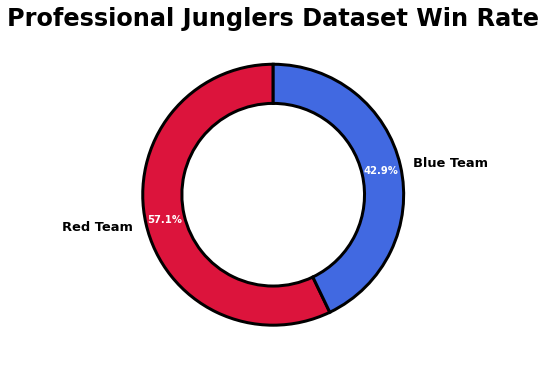

In [7]:
fig, ax = plt.subplots(figsize=(6, 6))
 
wedgeprops = {'width':0.3, 'edgecolor':'black', 'linewidth':3}

_, texts, autotexts = ax.pie([r,b], 
       wedgeprops= wedgeprops, 
       startangle=90,
       labels=["Red Team", "Blue Team"],
       autopct='%1.1f%%',
       pctdistance=0.85,
       colors=['crimson', 'royalblue'])

for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_weight("bold")
    autotext.set_fontsize(10)

texts[0].set_fontsize(13)
texts[1].set_fontsize(13)
texts[0].set_fontweight("bold")
texts[1].set_fontweight("bold")

plt.title('Professional Junglers Dataset Win Rate', fontsize=24, loc='center', fontweight="bold")

plt.show()

Champions' winrates

In [14]:
jungler_deaths_df = df[df["eventType"] == "Death"]
jungler_deaths_df

,gameId,team,summoner,region,champion,timestamp,coordinate_x,coordinate_y,level,minionsKilled,...,trueDamageDoneToChampions,trueDamageTaken,victory,eventType,skillSlot,buildingType,lane,monster,itemName,role
30,EUW1_6391611617,Red,anonymous 24,euw1,Karthus,8.881567,5197.0,9155.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
47,EUW1_6391611617,Red,anonymous 24,euw1,Karthus,12.790117,12423.0,6194.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
63,EUW1_6391611617,Red,anonymous 24,euw1,Karthus,18.093750,10098.0,2331.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
78,EUW1_6391611617,Red,anonymous 24,euw1,Karthus,22.241800,7291.0,1265.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
85,EUW1_6391611617,Red,anonymous 24,euw1,Karthus,24.723900,6321.0,2487.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54271,KR_6499748759,Red,anonymous 49,kr,Maokai,12.025933,9084.0,1037.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
54298,KR_6499748759,Red,anonymous 49,kr,Maokai,20.392433,5363.0,10258.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
54345,KR_6499716626,Red,anonymous 49,kr,Vi,10.034350,7654.0,6752.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
54369,KR_6499716626,Red,anonymous 49,kr,Vi,18.951050,3810.0,9300.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE


In [23]:
profiling_df = jungler_deaths_df[(jungler_deaths_df["victory"] == True)].copy()

In [24]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df[0])] = champs[str(champs_df[0])] + 1
    except:
        champs[str(champs_df[0])] = 1

#print("Victories with each champion:\n")
champs_df = pd.DataFrame.from_dict(champs, orient="index", columns=['victories'])
#champs_df.sort_values(by=["victories"], ascending=False)
#print(champs)
    

In [25]:
profiling_df = jungler_deaths_df[(jungler_deaths_df["victory"] == False)].copy()

In [26]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df2 = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df2[0])] = champs[str(champs_df2[0])] + 1
    except:
        champs[str(champs_df2[0])] = 1

champs_df2 = pd.DataFrame.from_dict(champs, orient="index", columns=['defeats'])

champs_winrate = [champs_df, champs_df2]
champs_winrate_df = pd.concat(champs_winrate, axis=1)

champsWinrates = []
for row in champs_winrate_df.iterrows():
    champsWinrates_row = {}
    if(np.isnan(row[1][0])):
        row[1][0] = 0
    if(np.isnan(row[1][1])):
        row[1][1] = 0
    champsWinrates_row["champion"] = str(row[0])
    champsWinrates_row["win rate"] = round(row[1][0]/(row[1][0] + row[1][1]), 2)
    champsWinrates_row["matches"] = row[1][0] + row[1][1]

    champsWinrates.append(champsWinrates_row)

champsWinrates_df = pd.DataFrame(champsWinrates).set_index(["champion"])
champsWinrates_df.sort_values(by=["matches", "win rate"], ascending= False)

,win rate,matches
champion,,
Nidalee,0.59,91.0
Khazix,0.53,81.0
LeeSin,0.56,80.0
Gragas,0.64,56.0
Viego,0.46,46.0
Neeko,0.45,38.0
Kindred,0.62,32.0
Poppy,0.50,30.0
Belveth,0.56,25.0


In [15]:
print("This dataset contains {} matches in which the jungler died at least once".format(len(np.unique(jungler_deaths_df["gameId"]))))

This dataset contains 646 matches in which the jungler died at least once


In [28]:
print("{} players died a total of {} times".format(len(np.unique(jungler_deaths_df["summoner"])), jungler_deaths_df.shape[0]))

19 players died a total of 3109 times


In [29]:
print("This Dataset contains an average of {} deaths per game".format((jungler_deaths_df.shape[0]/len(np.unique(jungler_deaths_df["gameId"])))))

This Dataset contains an average of 4.812693498452012 deaths per game


Change summoner names to anonymous names

In [30]:
""" df3 = df

count = 0
for player in players["professionals"]["players"]:
    count += 1
    anonymousName = "anonymous"
    anonymousName = anonymousName + " " + str(count)
    summoner_names = []
    summoner_names.append(player["summoner_name"])
    try:
        if(player["old_summoner_names"]):
            for p in player["old_summoner_names"]:
                if(p != player["summoner_name"]):
                    summoner_names.append(p)
    except:
        pass
    df3 = df3.replace(summoner_names, anonymousName) """
    #print(summoner_names)

' df3 = df\n\ncount = 0\nfor player in players["professionals"]["players"]:\n    count += 1\n    anonymousName = "anonymous"\n    anonymousName = anonymousName + " " + str(count)\n    summoner_names = []\n    summoner_names.append(player["summoner_name"])\n    try:\n        if(player["old_summoner_names"]):\n            for p in player["old_summoner_names"]:\n                if(p != player["summoner_name"]):\n                    summoner_names.append(p)\n    except:\n        pass\n    df3 = df3.replace(summoner_names, anonymousName) '

In [31]:
#len(np.unique(df["summoner"]))

In [32]:
#len(np.unique(df3["summoner"]))

Remove 5 Features

In [33]:
#df3 = df3.drop(columns=["bonusArmorPenPercent", "bonusMagicPenPercent", "physicalVamp", "abilityHaste", "cooldownReduction"])
#df3

Final Professional Dataset

In [34]:
#df3.to_csv('Professional/FinalProfessionalPlayersDataset.csv', index = False)

---

### Amateurs Players Data Set

In [8]:
df = pd.read_csv("Amateur/FinalAmateurPlayersDataset2.csv")
df

,gameId,team,summoner,region,champion,timestamp,coordinate_x,coordinate_y,level,minionsKilled,...,trueDamageTaken,victory,eventType,skillSlot,buildingType,lane,monster,itemName,role,rank
0,EUW1_6390658537,Red,anonymous 8,euw1,JarvanIV,0.000000,14539.0,14394.0,1.0,0.0,...,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE,Iron
1,EUW1_6390658537,Red,anonymous 8,euw1,JarvanIV,1.000367,9438.0,5576.0,1.0,0.0,...,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE,Iron
2,EUW1_6390658537,Red,anonymous 8,euw1,JarvanIV,0.086533,NaN,NaN,NaN,NaN,...,NaN,False,Item purchased,NaN,NaN,NaN,NaN,Health Potion,JUNGLE,Iron
3,EUW1_6390658537,Red,anonymous 8,euw1,JarvanIV,0.095500,NaN,NaN,NaN,NaN,...,NaN,False,Item purchased,NaN,NaN,NaN,NaN,Scorchclaw Pup,JUNGLE,Iron
4,EUW1_6390658537,Red,anonymous 8,euw1,JarvanIV,0.115067,NaN,NaN,NaN,NaN,...,NaN,False,Item purchased,NaN,NaN,NaN,NaN,Stealth Ward,JUNGLE,Iron
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64080,EUW1_6407761926,Blue,anonymous 172,euw1,Viego,15.004650,10066.0,5786.0,8.0,2.0,...,532.0,False,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE,Gold
64081,EUW1_6407761926,Blue,anonymous 172,euw1,Viego,16.005033,1211.0,7279.0,9.0,3.0,...,532.0,False,NaN,NaN,NaN,NaN,NaN,NaN,JUNGLE,Gold
64082,EUW1_6407761926,Blue,anonymous 172,euw1,Viego,15.268667,NaN,NaN,NaN,NaN,...,NaN,False,SkillLevelUp,1.0,NaN,NaN,NaN,NaN,JUNGLE,Gold
64083,EUW1_6407761926,Blue,anonymous 172,euw1,Viego,15.639450,NaN,NaN,NaN,NaN,...,NaN,False,Item purchased,NaN,NaN,NaN,NaN,Plated Steelcaps,JUNGLE,Gold


Remove remaked matches

In [36]:
games = df[df["timestamp"] > 5]

remaked = []
totalMatches = len(np.unique(games["gameId"]))
count = 0
for match in np.unique(df["gameId"]):
    count += 1
    print("{} of {}".format(count, totalMatches))
    if((match in np.unique(games["gameId"])) == False):
        remaked.append(match)

print("Number of remaked matches: {}".format(len(remaked)))

1 of 757
2 of 757
3 of 757
4 of 757
5 of 757
6 of 757
7 of 757
8 of 757
9 of 757
10 of 757
11 of 757
12 of 757
13 of 757
14 of 757
15 of 757
16 of 757
17 of 757
18 of 757
19 of 757
20 of 757
21 of 757
22 of 757
23 of 757
24 of 757
25 of 757
26 of 757
27 of 757
28 of 757
29 of 757
30 of 757
31 of 757
32 of 757
33 of 757
34 of 757
35 of 757
36 of 757
37 of 757
38 of 757
39 of 757
40 of 757
41 of 757
42 of 757
43 of 757
44 of 757
45 of 757
46 of 757
47 of 757
48 of 757
49 of 757
50 of 757
51 of 757
52 of 757
53 of 757
54 of 757
55 of 757
56 of 757
57 of 757
58 of 757
59 of 757
60 of 757
61 of 757
62 of 757
63 of 757
64 of 757
65 of 757
66 of 757
67 of 757
68 of 757
69 of 757
70 of 757
71 of 757
72 of 757
73 of 757
74 of 757
75 of 757
76 of 757
77 of 757
78 of 757
79 of 757
80 of 757
81 of 757
82 of 757
83 of 757
84 of 757
85 of 757
86 of 757
87 of 757
88 of 757
89 of 757
90 of 757
91 of 757
92 of 757
93 of 757
94 of 757
95 of 757
96 of 757
97 of 757
98 of 757
99 of 757
100 of 757
101 of 7

Add division column

In [37]:
""" divisions = []

summoners = np.unique(df["summoner"])
count = 0
for row in df.iterrows():
    count += 1
    print("{} of {}".format(count, df.shape[0]))
    summoner_name = row[1]["summoner"]
    for player in players["amateurs"]["players"]:
        if(summoner_name == player["summoner_name"]):
            divisions.append(player["rank"])
            break
        else:
            try:
                if(player["old_summoner_names"]):
                    if((summoner_name in player["old_summoner_names"]) == True):
                        divisions.append(player["rank"])
                        break
            except:
                pass """

' divisions = []\n\nsummoners = np.unique(df["summoner"])\ncount = 0\nfor row in df.iterrows():\n    count += 1\n    print("{} of {}".format(count, df.shape[0]))\n    summoner_name = row[1]["summoner"]\n    for player in players["amateurs"]["players"]:\n        if(summoner_name == player["summoner_name"]):\n            divisions.append(player["rank"])\n            break\n        else:\n            try:\n                if(player["old_summoner_names"]):\n                    if((summoner_name in player["old_summoner_names"]) == True):\n                        divisions.append(player["rank"])\n                        break\n            except:\n                pass '

In [38]:
#len(divisions)

In [39]:
#df["rank"] = divisions
#df

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64085 entries, 0 to 64084
Data columns (total 56 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   gameId                         64085 non-null  object 
 1   team                           64085 non-null  object 
 2   summoner                       64085 non-null  object 
 3   region                         64085 non-null  object 
 4   champion                       64085 non-null  object 
 5   timestamp                      64085 non-null  float64
 6   coordinate_x                   37749 non-null  float64
 7   coordinate_y                   37749 non-null  float64
 8   level                          23140 non-null  float64
 9   minionsKilled                  23140 non-null  float64
 10  jungleMinionsKilled            23140 non-null  float64
 11  currentGold                    23140 non-null  float64
 12  goldPerSecond                  23140 non-null 

In [41]:
df['monster'].value_counts(dropna=False)

NaN                61500
RIFTHERALD           751
BARON_NASHOR         424
AIR_DRAGON           243
CHEMTECH_DRAGON      233
EARTH_DRAGON         230
HEXTECH_DRAGON       230
FIRE_DRAGON          226
WATER_DRAGON         219
ELDER_DRAGON          29
Name: monster, dtype: int64

In [42]:
df2 = df
df2['skillSlot'] = df['skillSlot'].apply(str)
np.unique(df["skillSlot"])

array(['1.0', '2.0', '3.0', '4.0', 'nan'], dtype=object)

In [43]:
df2 = df
df2['buildingType'] = df['buildingType'].apply(str)
np.unique(df["buildingType"])

array(['INHIBITOR_BUILDING', 'TOWER_BUILDING', 'nan'], dtype=object)

In [44]:
df2 = df
df2['lane'] = df['lane'].apply(str)
np.unique(df["lane"])

array(['BOT_LANE', 'MID_LANE', 'TOP_LANE', 'nan'], dtype=object)

In [45]:
df2 = df
df2['monster'] = df['monster'].apply(str)
np.unique(df["monster"])

array(['AIR_DRAGON', 'BARON_NASHOR', 'CHEMTECH_DRAGON', 'EARTH_DRAGON',
       'ELDER_DRAGON', 'FIRE_DRAGON', 'HEXTECH_DRAGON', 'RIFTHERALD',
       'WATER_DRAGON', 'nan'], dtype=object)

In [46]:
print("The data set with professional players contains {} matches.".format(len(np.unique(df["gameId"]))))

The data set with professional players contains 757 matches.


In [47]:
print("The data set with professional players contains {} players.".format(len(np.unique(df["summoner"]))))

The data set with professional players contains 24 players.


Matches per role:

In [48]:
gameRoles = ["TOP", "JUNGLE","MIDDLE", "BOTTOM", "UTILITY"]

for role in gameRoles:
    temporary_df = df[df["role"] == role]
    matches_per_role = len(np.unique(temporary_df["gameId"]))
    print("{} matches: {}".format(role, matches_per_role))

TOP matches: 0
JUNGLE matches: 757
MIDDLE matches: 0
BOTTOM matches: 0
UTILITY matches: 0


Players per role:

In [49]:
gameRoles = ["TOP", "JUNGLE","MIDDLE", "BOTTOM", "UTILITY"]

for role in gameRoles:
    temporary_df = df[df["role"] == role]
    players_per_role = len(np.unique(temporary_df["summoner"]))
    print("{} players: {}".format(role, players_per_role))

TOP players: 0
JUNGLE players: 24
MIDDLE players: 0
BOTTOM players: 0
UTILITY players: 0


Matches per division

In [50]:
ranks = ["Iron", "Bronze","Silver", "Gold", "Platinum"]

for rank in ranks:
    temporary_df = df[df["rank"] == rank]
    matches_per_division = len(np.unique(temporary_df["gameId"]))
    print("{} matches: {}".format(rank, matches_per_division))

Iron matches: 35
Bronze matches: 205
Silver matches: 74
Gold matches: 168
Platinum matches: 248


Player per division:

In [51]:
ranks = ["Iron", "Bronze","Silver", "Gold", "Platinum"]

for rank in ranks:
    temporary_df = df[df["rank"] == rank]
    players_per_division = len(np.unique(temporary_df["summoner"]))
    print("{} players: {}".format(rank, players_per_division))

Iron players: 2
Bronze players: 6
Silver players: 3
Gold players: 6
Platinum players: 6


Average game time

In [52]:
temp_df = df[df["eventType"].isna()]
temp_df

match_time = []
for match in np.unique(temp_df["gameId"]):
    tempV2_df = temp_df[temp_df["gameId"] == match]
    tempV2_df = tempV2_df.sort_values(by=["timestamp"])
    match_time.append(np.amax(tempV2_df["timestamp"]))

print("The matches have an average time of {}".format(np.mean(match_time)))

The matches have an average time of 29.071271290180533


In [53]:
temp_df = df[(df["eventType"].isna()) & (df["team"] == "Red") & (df["victory"] == True)]
temp_df

match_time = []
for match in np.unique(temp_df["gameId"]):
    tempV2_df = temp_df[temp_df["gameId"] == match]
    tempV2_df = tempV2_df.sort_values(by=["timestamp"])
    match_time.append(np.amax(tempV2_df["timestamp"]))

print("The matches have an average time of {} when they win on the red side".format(np.mean(match_time)))

The matches have an average time of 29.238421676300575 when they win on the red side


In [54]:
temp_df = df[(df["eventType"].isna()) & (df["team"] == "Red") & (df["victory"] == False)]
temp_df

match_time = []
for match in np.unique(temp_df["gameId"]):
    tempV2_df = temp_df[temp_df["gameId"] == match]
    tempV2_df = tempV2_df.sort_values(by=["timestamp"])
    match_time.append(np.amax(tempV2_df["timestamp"]))

print("The matches have an average time of {} when they lose on the red side".format(np.mean(match_time)))

The matches have an average time of 29.141248106060605 when they lose on the red side


In [55]:
temp_df = df[(df["eventType"].isna()) & (df["team"] == "Blue") & (df["victory"] == True)]
temp_df

match_time = []
for match in np.unique(temp_df["gameId"]):
    tempV2_df = temp_df[temp_df["gameId"] == match]
    tempV2_df = tempV2_df.sort_values(by=["timestamp"])
    match_time.append(np.amax(tempV2_df["timestamp"]))

print("The matches have an average time of {} when they win on the blue side".format(np.mean(match_time)))

The matches have an average time of 28.98808888888889 when they win on the blue side


In [56]:
temp_df = df[(df["eventType"].isna()) & (df["team"] == "Blue") & (df["victory"] == False)]
temp_df

match_time = []
for match in np.unique(temp_df["gameId"]):
    tempV2_df = temp_df[temp_df["gameId"] == match]
    tempV2_df = tempV2_df.sort_values(by=["timestamp"])
    match_time.append(np.amax(tempV2_df["timestamp"]))

print("The matches have an average time of {} when they lose on the blue side".format(np.mean(match_time)))

The matches have an average time of 28.950096614583334 when they lose on the blue side


win rate

In [9]:
blueSide_df = df[df["team"] == "Blue"]
gamesBlueSide = len(np.unique(blueSide_df["gameId"]))
redSide_df = df[df["team"] == "Red"]
gamesRedSide = len(np.unique(redSide_df["gameId"]))

redSideVictory_df = df[(df["team"] == "Red") & (df["victory"] == True)]
winsRedSide = len(np.unique(redSideVictory_df["gameId"]))

blueSideVictory_df = df[(df["team"] == "Blue") & (df["victory"] == True)]
winsBlueSide = len(np.unique(blueSideVictory_df["gameId"]))

wins_df = df[df["victory"] == True]
wins = len(np.unique(wins_df["gameId"]))

b = (winsBlueSide/ wins) * 100
r = (winsRedSide/ wins) * 100

print("Win Rates:")
print(" Red: {} vs Blue: {}".format(r, b))

Win Rates:
 Red: 44.473007712082264 vs Blue: 55.52699228791774


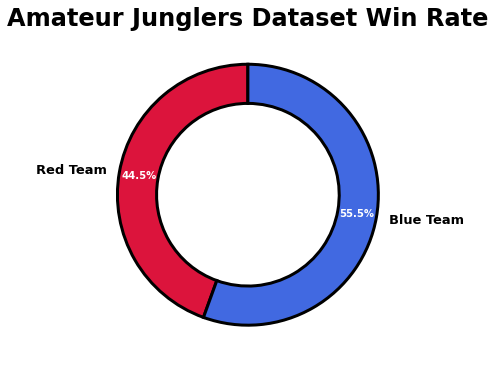

In [10]:
fig, ax = plt.subplots(figsize=(6, 6))
 
wedgeprops = {'width':0.3, 'edgecolor':'black', 'linewidth':3}

_, texts, autotexts = ax.pie([r,b], 
       wedgeprops= wedgeprops, 
       startangle=90,
       labels=["Red Team", "Blue Team"],
       autopct='%1.1f%%',
       pctdistance=0.85,
       colors=['crimson', 'royalblue'])

for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_weight("bold")
    autotext.set_fontsize(10)

texts[0].set_fontsize(13)
texts[1].set_fontsize(13)
texts[0].set_fontweight("bold")
texts[1].set_fontweight("bold")

plt.title('Amateur Junglers Dataset Win Rate', fontsize=24, loc='center', fontweight="bold")

plt.show()

Champions' winrates

In [57]:
jungler_deaths_df = df[df["eventType"] == "Death"]
jungler_deaths_df

,gameId,team,summoner,region,champion,timestamp,coordinate_x,coordinate_y,level,minionsKilled,...,trueDamageTaken,victory,eventType,skillSlot,buildingType,lane,monster,itemName,role,rank
15,EUW1_6390658537,Red,anonymous 8,euw1,JarvanIV,6.206050,10554.0,8703.0,NaN,NaN,...,NaN,False,Death,nan,nan,nan,nan,NaN,JUNGLE,Iron
26,EUW1_6390658537,Red,anonymous 8,euw1,JarvanIV,11.782183,825.0,9975.0,NaN,NaN,...,NaN,False,Death,nan,nan,nan,nan,NaN,JUNGLE,Iron
33,EUW1_6390658537,Red,anonymous 8,euw1,JarvanIV,13.607883,8685.0,6583.0,NaN,NaN,...,NaN,False,Death,nan,nan,nan,nan,NaN,JUNGLE,Iron
48,EUW1_6390658537,Red,anonymous 8,euw1,JarvanIV,18.484383,2004.0,7767.0,NaN,NaN,...,NaN,False,Death,nan,nan,nan,nan,NaN,JUNGLE,Iron
54,EUW1_6390658537,Red,anonymous 8,euw1,JarvanIV,20.061300,10027.0,5606.0,NaN,NaN,...,NaN,False,Death,nan,nan,nan,nan,NaN,JUNGLE,Iron
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64019,EUW1_6407810599,Red,anonymous 172,euw1,Viego,30.194417,6263.0,7130.0,NaN,NaN,...,NaN,True,Death,nan,nan,nan,nan,NaN,JUNGLE,Gold
64052,EUW1_6407761926,Blue,anonymous 172,euw1,Viego,3.635767,11589.0,2129.0,NaN,NaN,...,NaN,False,Death,nan,nan,nan,nan,NaN,JUNGLE,Gold
64060,EUW1_6407761926,Blue,anonymous 172,euw1,Viego,6.848700,11220.0,4287.0,NaN,NaN,...,NaN,False,Death,nan,nan,nan,nan,NaN,JUNGLE,Gold
64075,EUW1_6407761926,Blue,anonymous 172,euw1,Viego,12.076533,11809.0,2140.0,NaN,NaN,...,NaN,False,Death,nan,nan,nan,nan,NaN,JUNGLE,Gold


In [58]:
profiling_df = jungler_deaths_df[(jungler_deaths_df["victory"] == True)].copy()

In [59]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df[0])] = champs[str(champs_df[0])] + 1
    except:
        champs[str(champs_df[0])] = 1

#print("Victories with each champion:\n")
champs_df = pd.DataFrame.from_dict(champs, orient="index", columns=['victories'])
#champs_df.sort_values(by=["victories"], ascending=False)
#print(champs)
    

In [60]:
profiling_df = jungler_deaths_df[(jungler_deaths_df["victory"] == False)].copy()

In [61]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df2 = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df2[0])] = champs[str(champs_df2[0])] + 1
    except:
        champs[str(champs_df2[0])] = 1

champs_df2 = pd.DataFrame.from_dict(champs, orient="index", columns=['defeats'])

champs_winrate = [champs_df, champs_df2]
champs_winrate_df = pd.concat(champs_winrate, axis=1)

champsWinrates = []
for row in champs_winrate_df.iterrows():
    champsWinrates_row = {}
    if(np.isnan(row[1][0])):
        row[1][0] = 0
    if(np.isnan(row[1][1])):
        row[1][1] = 0
    champsWinrates_row["champion"] = str(row[0])
    champsWinrates_row["win rate"] = round(row[1][0]/(row[1][0] + row[1][1]), 2)
    champsWinrates_row["matches"] = row[1][0] + row[1][1]

    champsWinrates.append(champsWinrates_row)

champsWinrates_df = pd.DataFrame(champsWinrates).set_index(["champion"])
champsWinrates_df.sort_values(by=["matches", "win rate"], ascending= False)

,win rate,matches
champion,,
Viego,0.53,129.0
Kayn,0.58,90.0
Belveth,0.56,73.0
Lillia,0.50,46.0
Vi,0.44,41.0
Ekko,0.65,34.0
Nunu,0.54,28.0
Neeko,0.41,27.0
Udyr,0.38,26.0


In [62]:
print("This dataset contains {} matches in which the jungler died at least once".format(len(np.unique(jungler_deaths_df["gameId"]))))

This dataset contains 727 matches in which the jungler died at least once


In [63]:
print("{} players died a total of {} times".format(len(np.unique(jungler_deaths_df["summoner"])), jungler_deaths_df.shape[0]))

24 players died a total of 4800 times


In [64]:
print("This Dataset contains an average of {} deaths per game".format((jungler_deaths_df.shape[0]/len(np.unique(jungler_deaths_df["gameId"])))))

This Dataset contains an average of 6.6024759284731775 deaths per game


Change summoner names to anonymous names

In [65]:
""" df4 = df

count = 0
for player in players["amateurs"]["players"]:
    count += 1
    anonymousName = "anonymous"
    anonymousName = anonymousName + " " + str(count)
    summoner_names = []
    summoner_names.append(player["summoner_name"])
    try:
        if(player["old_summoner_names"]):
            for p in player["old_summoner_names"]:
                if(p != player["summoner_name"]):
                    summoner_names.append(p)
    except:
        pass
    df4 = df4.replace(summoner_names, anonymousName) """
    #print(summoner_names)

' df4 = df\n\ncount = 0\nfor player in players["amateurs"]["players"]:\n    count += 1\n    anonymousName = "anonymous"\n    anonymousName = anonymousName + " " + str(count)\n    summoner_names = []\n    summoner_names.append(player["summoner_name"])\n    try:\n        if(player["old_summoner_names"]):\n            for p in player["old_summoner_names"]:\n                if(p != player["summoner_name"]):\n                    summoner_names.append(p)\n    except:\n        pass\n    df4 = df4.replace(summoner_names, anonymousName) '

In [66]:
#len(np.unique(df["summoner"]))

In [67]:
#len(np.unique(df4["summoner"]))

Remove 5 Features

In [68]:
#df4 = df4.drop(columns=["bonusArmorPenPercent", "bonusMagicPenPercent", "physicalVamp", "abilityHaste", "cooldownReduction"])
#df4

Final Amateur Dataset

In [69]:
#df4.to_csv('Amateur/FinalAmateurPlayersDataset.csv', index = False)